In [1]:
# One-Sided Testing
# Scenario 1: Q = Bernoulli(0.95)  mu_0=0.1

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import json
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), 'scripts'))
from bet_co96 import call_process_co96
from bet_oj23 import call_process_oj23
from bet_ons import call_process_ons
from bet_ftrl_barrier import call_process_ftrl
from bet_optftrl_barrier import call_process_optftrl
from scipy.stats import truncnorm
np.random.seed(100) #reproducible

In [3]:
# Scenario 1: Q = Bernoulli(0.95)  mu_0=0.1
t     = 1500
iters = 300
mu_0  = 0.1

# **H1** scenario
y1 = np.random.binomial(1, 0.95, size=(iters, t))

# **H0** scenario
z1 = np.random.binomial(1, 0.09, size=(iters, 500))

In [4]:
y1 = np.array(y1)
z1 = np.array(z1)

alphas=np.linspace(0.005, 0.1, 20)
output_file='./results/Bernoulli_easy.json'
call_process_ons(y1, z1, mu_0, alphas, iters, output_file)
call_process_ftrl(y1,z1, mu_0, alphas, iters, output_file)
call_process_optftrl(y1, z1, mu_0, alphas, iters, output_file)
call_process_co96(y1, z1, mu_0, alphas, iters, output_file)
call_process_oj23(y1, z1, mu_0, alphas, iters, output_file)

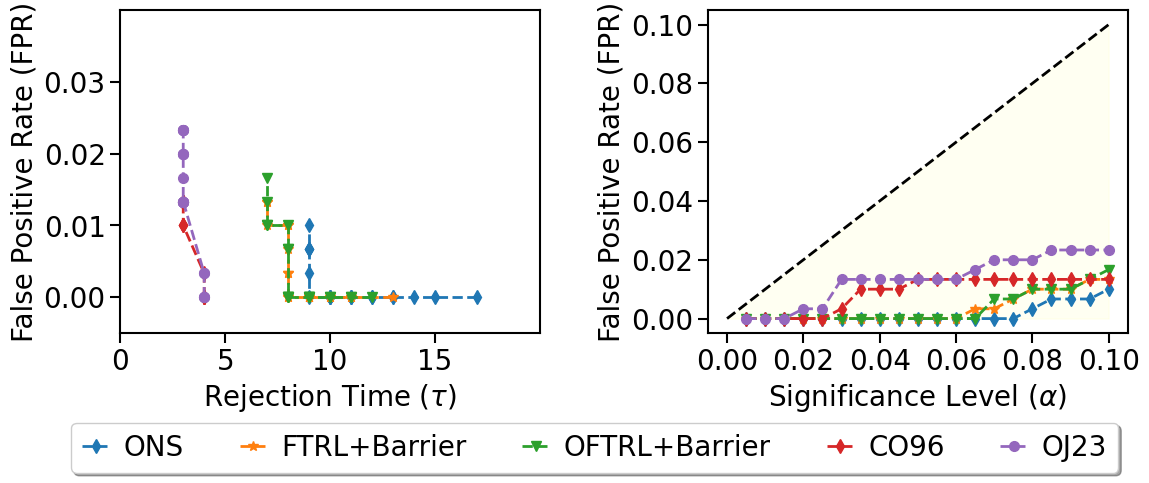

In [12]:
df_list = []

with open('./results/Bernoulli_easy.json', 'r') as file:
    items = json.load(file)


for item in items:
    df = pd.DataFrame({
        'rejection_time': item['rejection_time'],
        'fpr': item['fpr'],
        'name': item['method'], 
        'alpha': np.linspace(0.005, 0.1, len(item['fpr']))  
    })
    df_list.append(df)


fig, ax = plt.subplots(1, 2, figsize=(13, 4.2))  
i = 0
markers = ["d", "*", "v", "d", "o"]

 # Medium Aquamarine, Crimson

for df in df_list:
    ax[0].plot(df['rejection_time'], df['fpr'],ls='--', lw=2,  marker=markers[i], label=df['name'].iloc[0], markersize=7)
    ax[1].plot(df['alpha'], df['fpr'], ls='--', lw=2, marker=markers[i],label=df['name'].iloc[0], markersize=7)
    i += 1

ax[0].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[0].set_ylim(-0.005,0.04)
ax[0].set_yticks(np.arange(0,0.04,0.01))
ax[0].set_xlim(0,20)
ax[0].set_xticks(np.arange(0, 20, 5))
ax[0].set_xlabel(r'Rejection Time ($\tau$)', fontsize=20)
ax[0].set_ylabel('False Positive Rate (FPR)', fontsize=20)
x = np.linspace(0, 0.1, 500)
y = x 
ax[1].fill_between(x, 0, y, color='yellow', alpha=0.05, zorder=1)  
ax[1].set_ylim(-0.005,0.105)
ax[1].set_yticks(np.arange(0,0.105,0.02))
ax[1].set_xlim(-0.005,0.105)
ax[1].set_xticks(np.arange(0,0.105,0.02))
ax[1].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[1].plot([0, 0.1], [0, 0.1], color='k', ls='--',  lw=2)
ax[1].set_xlabel(r'Significance Level ($\alpha$)', fontsize=20)
ax[1].set_ylabel('False Positive Rate (FPR)', fontsize=20)
handles, labels = next(ax.flat).get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.49, -0.07), fancybox=True, shadow=True,
             ncol=5, fontsize=20, labelspacing=0.1, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.4)  
for axis in ax:  
    for spine in axis.spines.values():
        spine.set_linewidth(1.5)  

plt.savefig('./plot_results/Bernoulli_easy.png', dpi=300, bbox_inches='tight')  


In [6]:
df_list

[    rejection_time       fpr name  alpha
 0             17.0  0.000000  ONS  0.005
 1             15.0  0.000000  ONS  0.010
 2             14.0  0.000000  ONS  0.015
 3             13.0  0.000000  ONS  0.020
 4             13.0  0.000000  ONS  0.025
 5             12.0  0.000000  ONS  0.030
 6             12.0  0.000000  ONS  0.035
 7             11.0  0.000000  ONS  0.040
 8             11.0  0.000000  ONS  0.045
 9             11.0  0.000000  ONS  0.050
 10            10.0  0.000000  ONS  0.055
 11            10.0  0.000000  ONS  0.060
 12            10.0  0.000000  ONS  0.065
 13            10.0  0.000000  ONS  0.070
 14             9.0  0.000000  ONS  0.075
 15             9.0  0.003333  ONS  0.080
 16             9.0  0.006667  ONS  0.085
 17             9.0  0.006667  ONS  0.090
 18             9.0  0.006667  ONS  0.095
 19             9.0  0.010000  ONS  0.100,
     rejection_time       fpr          name  alpha
 0             13.0  0.000000  FTRL+Barrier  0.005
 1             